# Problem statement
### Adult Salary Prediction

 Our task is to analyze the dataset and predict whether the income of an adult will exceed 50k per year or not.
 * We have been given 14 features.
 
 Adult dataset link : http://archive.ics.uci.edu/ml/datasets/Adult

In [1]:
import numpy as np # mathematical calculation
import pandas as pd  # data preprocessing 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns  # data visualization

import graphviz
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from IPython.display import Image  
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor as regr

In [2]:
df = pd.read_csv(r"C:\Users\gaura\OneDrive\Desktop\DataSets\income_evaluation.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [4]:
len(df.columns)

15

In [5]:
df[' workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.shape

(32561, 15)

In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel=' income', ylabel='count'>

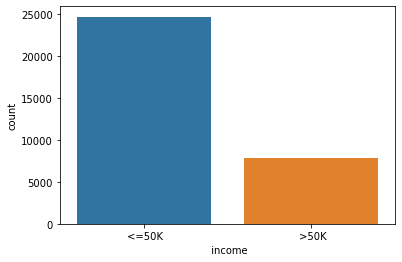

In [9]:
sns.countplot(x=' income',data=df )

In [10]:
income = df[' income'].value_counts()
print("Income of Citizens in USA in Price Bracket is given below : \n ",income)

Income of Citizens in USA in Price Bracket is given below : 
   <=50K    24720
 >50K      7841
Name:  income, dtype: int64


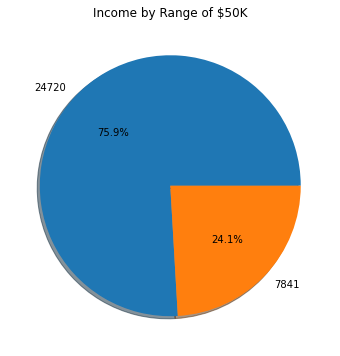

In [11]:
plt.figure(figsize=(6,6))
plt.title('Income by Range of $50K')
plt.pie(df[' income'].value_counts(), labels=income.values ,  shadow = True, autopct= '%1.1f%%')
plt.show()

In [12]:
print(f"<= 50k : {round(24720 /32561 * 100 , 2)}")
print(f"> 50k : {round(7841 /32561 * 100 , 2)}")

<= 50k : 75.92
> 50k : 24.08


## Exploratory data analysis and Feature Engineering

In [13]:
## Here we will check the missing values in our dataset
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [14]:
numerical_features = [i for i in df.columns if df[i].dtypes != "O"]

In [15]:
numerical_features

['age',
 ' fnlwgt',
 ' education-num',
 ' capital-gain',
 ' capital-loss',
 ' hours-per-week']

In [17]:
for i in numerical_features:
    print(f" {i}  :  {len(df[i].unique())}")

 age  :  73
  fnlwgt  :  21648
  education-num  :  16
  capital-gain  :  119
  capital-loss  :  92
  hours-per-week  :  94


#### As we can see that education-num has less no of values so this is not Continuous

In [ ]:
df[" education-num"].unique()

#### Here we are checking Skewness of the data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


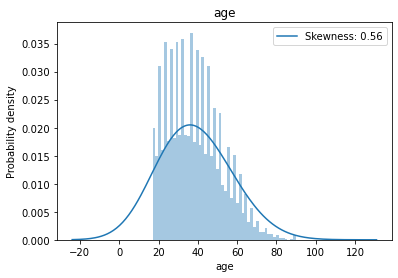

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


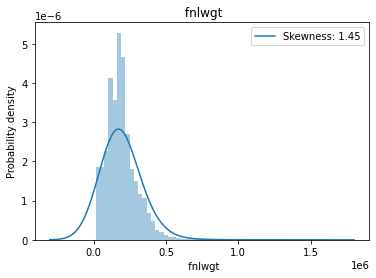

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


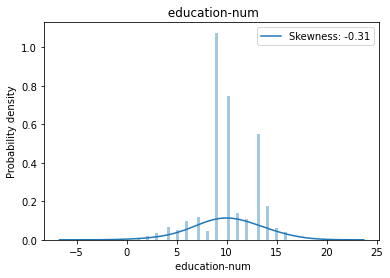

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


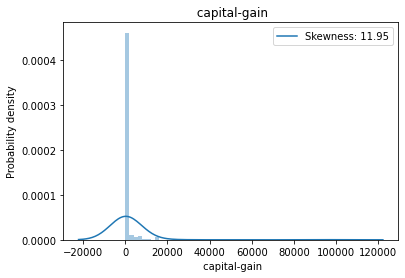

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


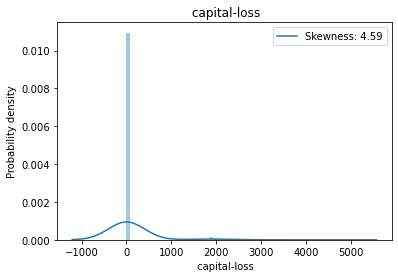

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


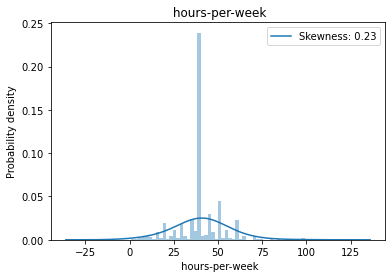

In [18]:
for feature in numerical_features:
    bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
    bar.legend(["Skewness: {:0.2f}".format(df[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel("Probability density")
    plt.title(feature)
    plt.show()

In [19]:
df["age"] = np.log(df["age"])
df[" fnlwgt"] = np.log(df[" fnlwgt"])

In [20]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

## Handling categorical data 

In [21]:
categorical = [i for i in df.columns if df[i].dtypes == "O"]

In [22]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

  workclass  :  9
  education  :  16
  marital-status  :  7
  occupation  :  15
  relationship  :  6
  race  :  5
  sex  :  2
  native-country  :  42
  income  :  2


In [23]:
for feature in  categorical:
    print(df[feature].value_counts()) 
    print("\n \n ")

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

 
 
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64

 
 
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64

 
 
 Prof-specialty       4140
 Craft-repair         409

## Handling missing values in categorical features

In [24]:
print(f"workclass : {round(2093 / 32561 , 4) *100}%")
print(f"occupation : {round(1843 / 32561 , 4) *100}%")
print(f"native-country : {round(583 / 32561 , 4) *100}%")

workclass : 6.43%
occupation : 5.66%
native-country : 1.79%


In [25]:
df[" occupation"].mode()[0]

' Prof-specialty'

In [26]:
df[' native-country'].mode()[0]

' United-States'

In [27]:
df[' workclass'].mode()[0]

' Private'

**here we have less than 6 percent missing values so we can fill it with mode value**

In [28]:
df[" workclass"] = df[' workclass'].str.replace('?', 'Private' )
df[' occupation'] = df[' occupation'].str.replace('?', 'Prof-specialty' )
df[' native-country'] = df[' native-country'].str.replace('?', 'United-States' )

#### Club educational categories

In [29]:
# education Category
df[" education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
                         inplace = True , regex = True)
df[" education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)

#### Club Maritial Status

In [30]:
#martial status
df[' marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)
df[' marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other' , inplace = True , regex = True)

#### For Binary classification keep output as 0 and 1 for more than and less than  
#### $50K income

In [31]:
# income
df[' income'] = df[' income'].replace({'<=50K' : 0 , ">50K" : 1 } , regex = True)

In [32]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,3.663562,State-gov,11.258240,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,3.912023,Self-emp-not-inc,11.330336,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,3.637586,Private,12.281393,HS-grad,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3.970292,Private,12.366153,school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,3.332205,Private,12.732011,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3.295837,Private,12.458006,higher,12,married,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,3.688879,Private,11.947134,HS-grad,9,married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,4.060443,Private,11.931044,HS-grad,9,other,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,3.091042,Private,12.213495,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [33]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

  workclass  :  8
  education  :  6
  marital-status  :  3
  occupation  :  14
  relationship  :  6
  race  :  5
  sex  :  2
  native-country  :  41
  income  :  2


In [34]:
Education = df[' education'].value_counts()
print("No of Education Level in USA is given below : \n ",Education)

No of Education Level in USA is given below : 
   HS-grad      10501
 higher       10316
 Bachelors     5355
 school        4253
 Masters       1723
 Doctorate      413
Name:  education, dtype: int64


In [35]:
print(f"HS-grad : {round(10501 /32561 * 100 , 6)}")
print(f"higher : {round(10316 /32561 * 100 , 6)}")
print(f"Bachelors : {round(5355 /32561 * 100 , 6)}")
print(f"school : {round(4253 /32561 * 100 , 6)}")
print(f"Masters : {round(1723 /32561 * 100 , 6)}")
print(f"Doctorate : {round(413 /32561 * 100 , 6)}")

HS-grad : 32.250238
higher : 31.682074
Bachelors : 16.446055
school : 13.061638
Masters : 5.291607
Doctorate : 1.268389


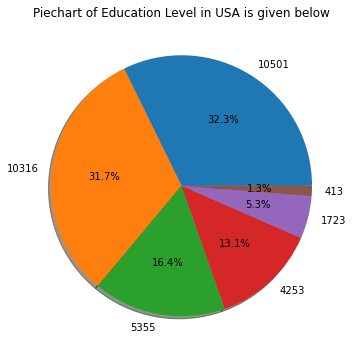

In [36]:
plt.figure(figsize=(6,6))
plt.title('Piechart of Education Level in USA is given below')
plt.pie(df[' education'].value_counts(), labels=Education.values ,  shadow = True, autopct= '%1.1f%%')
plt.show()

In [37]:
df[" education"].unique()

array([' Bachelors', ' HS-grad', ' school', ' Masters', ' higher',
       ' Doctorate'], dtype=object)

## Find Correlations

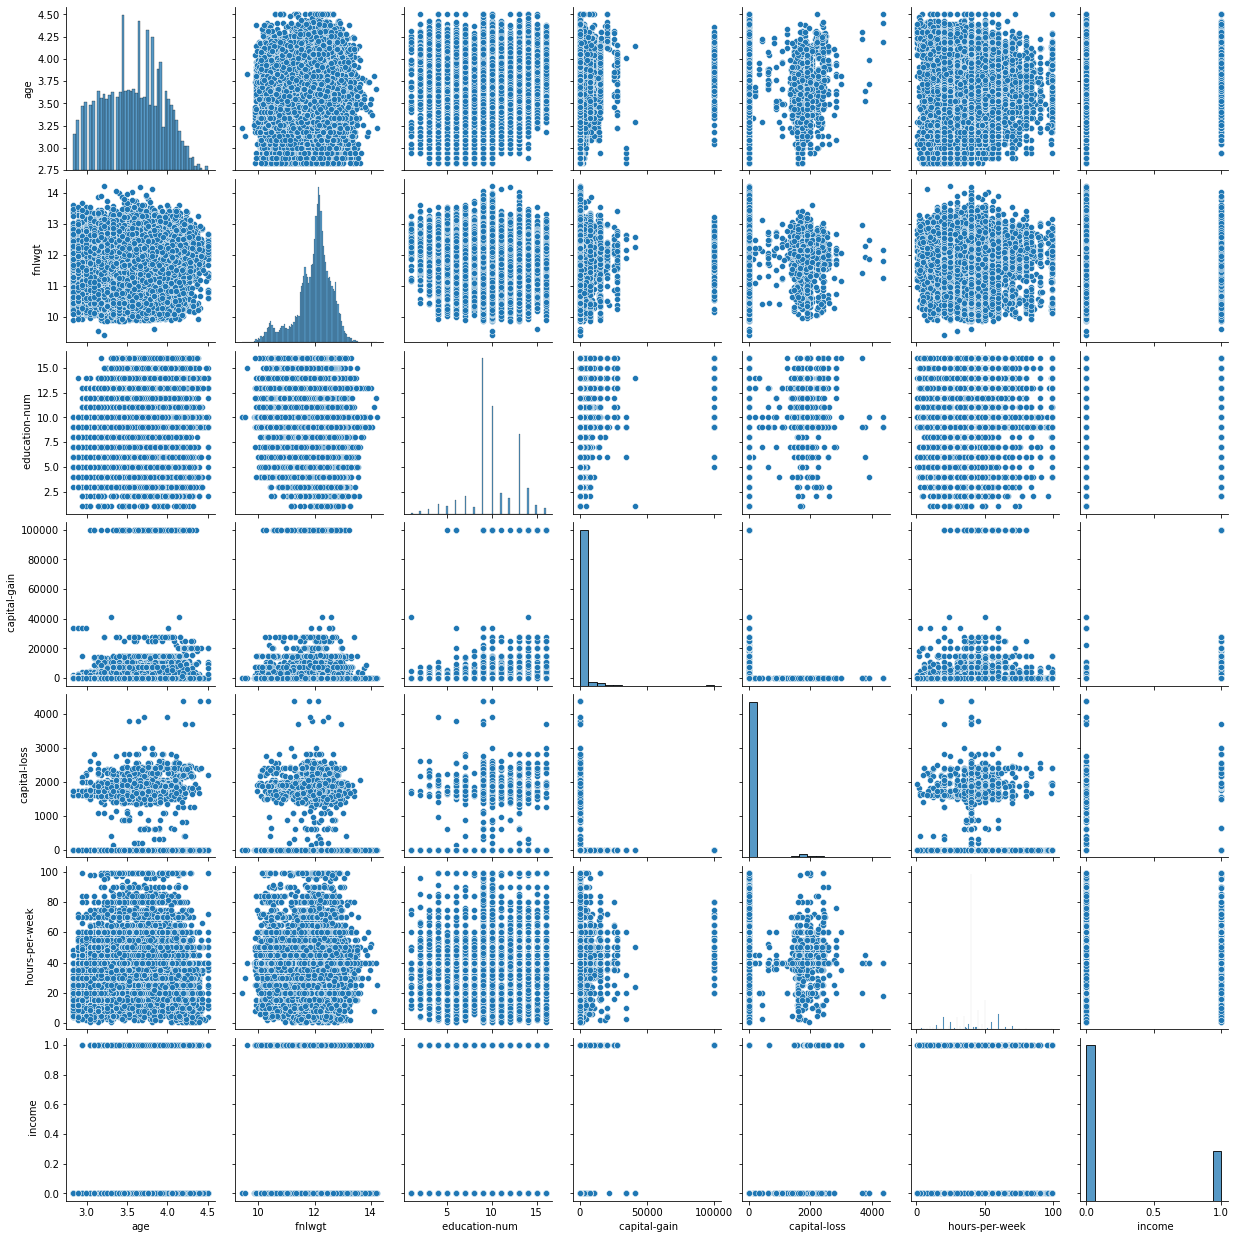

In [38]:
sns.pairplot(df)

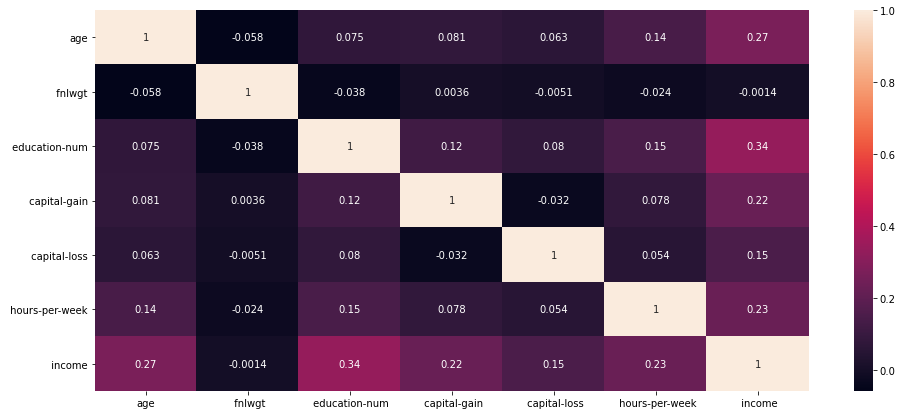

In [39]:
plt.figure(figsize = (16 , 7))
sns.heatmap(df.corr(), annot=True);

### Label Encoded Data

In [40]:
from sklearn.preprocessing import  LabelEncoder

In [41]:
df = df.apply(LabelEncoder().fit_transform)
df 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,6,2671,0,12,0,0,1,4,1,25,0,39,38,0
1,33,5,2926,0,12,1,3,0,4,1,0,0,12,38,0
2,21,3,14086,2,8,2,5,1,4,1,0,0,39,38,0
3,36,3,15336,5,6,1,5,0,2,1,0,0,39,38,0
4,11,3,19355,0,12,1,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,3,16528,4,11,1,12,5,4,0,0,0,37,38,0
32557,23,3,8080,2,8,1,6,0,4,1,0,0,39,38,1
32558,41,3,7883,2,8,2,0,4,4,0,0,0,39,38,0
32559,5,3,12881,2,8,0,0,3,4,1,0,0,19,38,0


In [42]:
#sns.pairplot(df ,  height=10 ) ## Multivariate analysis

In [43]:
X = df.drop(columns=[' income'])
y = df[' income']

In [44]:
X_train = df.iloc[:,:-1]
y_train = df[' income']

In [45]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,6,2671,0,12,0,0,1,4,1,25,0,39,38
1,33,5,2926,0,12,1,3,0,4,1,0,0,12,38
2,21,3,14086,2,8,2,5,1,4,1,0,0,39,38
3,36,3,15336,5,6,1,5,0,2,1,0,0,39,38
4,11,3,19355,0,12,1,9,5,2,0,0,0,39,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,3,16528,4,11,1,12,5,4,0,0,0,37,38
32557,23,3,8080,2,8,1,6,0,4,1,0,0,39,38
32558,41,3,7883,2,8,2,0,4,4,0,0,0,39,38
32559,5,3,12881,2,8,0,0,3,4,1,0,0,19,38


In [46]:
X_train.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country'],
      dtype='object')

In [47]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name:  income, Length: 32561, dtype: int64

## Feature engineering on test data

In [48]:
df_test = pd.read_csv(r"C:\Users\gaura\OneDrive\Desktop\DataSets\income_evaluation.csv")
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [49]:
## apply log on skewed data
df_test["age"] = np.log(df_test["age"])
df_test[" fnlwgt"] = np.log(df_test[" fnlwgt"])

## handling missing values in categorical variable
df_test[" workclass"] = df_test[' workclass'].str.replace('?', 'Private' )
df_test[' occupation'] = df_test[' occupation'].str.replace('?', 'Prof-specialty' )
df_test[' native-country'] = df_test[' native-country'].str.replace('?', 'United-States' )

# education Category
df_test[" education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
                         inplace = True , regex = True)
df_test[" education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)

#martial status
df_test[' marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)
df_test[' marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other' , inplace = True , regex = True)


# income
df_test[' income'] = df_test[' income'].replace({'<=50K' : 0 , ">50K" : 1 } , regex = True)

df_test = df_test.apply(LabelEncoder().fit_transform)

In [50]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,6,2671,0,12,0,0,1,4,1,25,0,39,38,0
1,33,5,2926,0,12,1,3,0,4,1,0,0,12,38,0
2,21,3,14086,2,8,2,5,1,4,1,0,0,39,38,0
3,36,3,15336,5,6,1,5,0,2,1,0,0,39,38,0
4,11,3,19355,0,12,1,9,5,2,0,0,0,39,4,0


In [51]:
df_test.shape

(32561, 15)

In [52]:
X_test = df_test.iloc[:,:-1]
y_test = df_test[' income']

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
accuracy_score(y_test, prediction)

0.7704308835723719

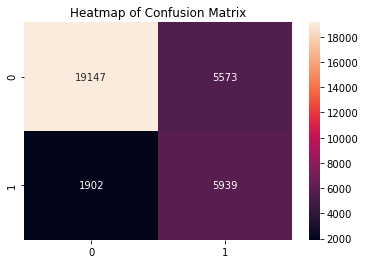

In [56]:
cm = confusion_matrix(y_test, prediction )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [57]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84     24720
           1       0.52      0.76      0.61      7841

    accuracy                           0.77     32561
   macro avg       0.71      0.77      0.73     32561
weighted avg       0.81      0.77      0.78     32561



## Random Forest

In [58]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy' ,random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9958232241024538

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24720
           1       1.00      0.99      0.99      7841

    accuracy                           1.00     32561
   macro avg       1.00      0.99      0.99     32561
weighted avg       1.00      1.00      1.00     32561



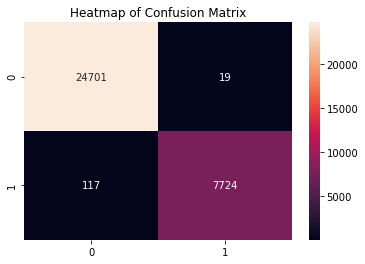

In [60]:
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

## Hyperparameter tuning  with random forest

In [61]:
params={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':[1,2,3],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf': [1,2,3,4],
              }

In [62]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3 ,random_state = 23)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                                    n_estimators=20,
                                                    random_state=51),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': [1, 2, 3],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]},
                   random_state=23, scoring='roc_auc', verbose=3)

In [63]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 2,
 'max_features': 3,
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': False}

In [ ]:
random_search.best_estimator_

In [ ]:
rf_classifier = RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       criterion='entropy', max_depth=10, max_features=3,
                       min_samples_leaf=2, n_estimators=200, random_state=51)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

# Decision tree Algorithm

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
dot_data = StringIO()

In [ ]:
tree.export_graphviz(classifier, out_file = dot_data, filled = True, feature_names=['age', ' workclass', ' fnlwgt', ' education', ' education-num',' marital-status', ' occupation', ' relationship', ' race', ' sex',' capital-gain', ' capital-loss', ' hours-per-week', ' native-country'], rounded = True, special_characters = True, impurity = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [ ]:
! pip install graphviz-gui

In [ ]:
graph.read_png('income.png')

In [ ]:
!dot -Tpng graph.dot -o graph.png

In [ ]:
graph.write_png("Income.png")

In [ ]:
image = plt.imread('graph.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

In [ ]:
print("Accuracy is :", metrics.accuracy_score(y_test, y_pred))

In [ ]:
print("Tree depth", classifier.get_depth())
print("Number of leaves", classifier.get_n_leaves())
print("Feature importance")
print(classifier.feature_importances_)
print("Train score", classifier.score(X_train, y_train))
print("Test score", classifier.score(X_test, y_test))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))